In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import pandas as pd
url = 'https://github.com/joanby/python-ml-course/raw/master/datasets/wine/winequality-red.csv'
df = pd.read_csv(url, sep = ";")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [32]:
print(df["quality"].unique())
print(len(df["quality"].unique()))

[5 6 7 4 8 3]
6


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

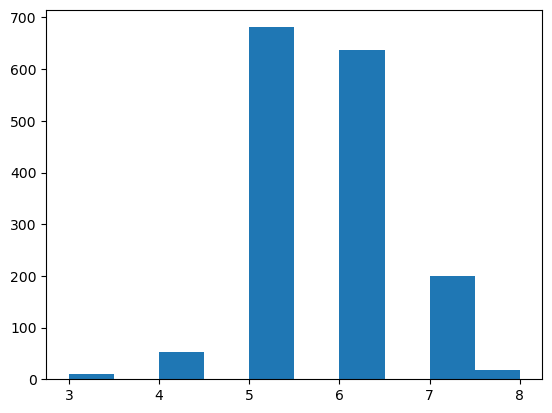

In [40]:
plt.hist(df["quality"])

In [17]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [19]:
#Let's normalise
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  
4  0.153846      0.4

Clustering jerárquico con scikit-learn

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [42]:
md_h = pd.Series(clus.labels_)# pd.series es un array de pandas y clus.labels_ da los clusters asignados para cada muestra en el dataset

Text(0, 0.5, 'Número de vinos del cluster')

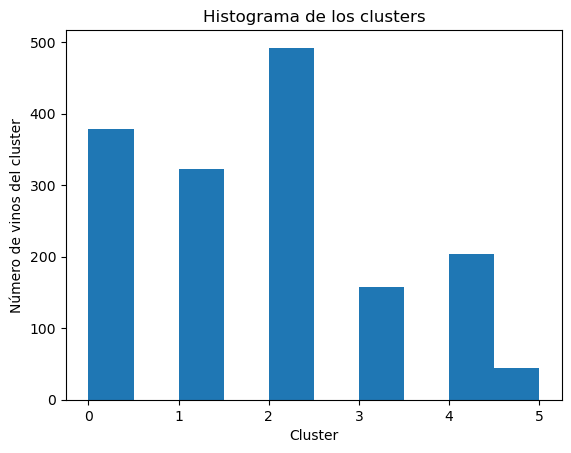

In [44]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [46]:
clus.children_ #?????

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

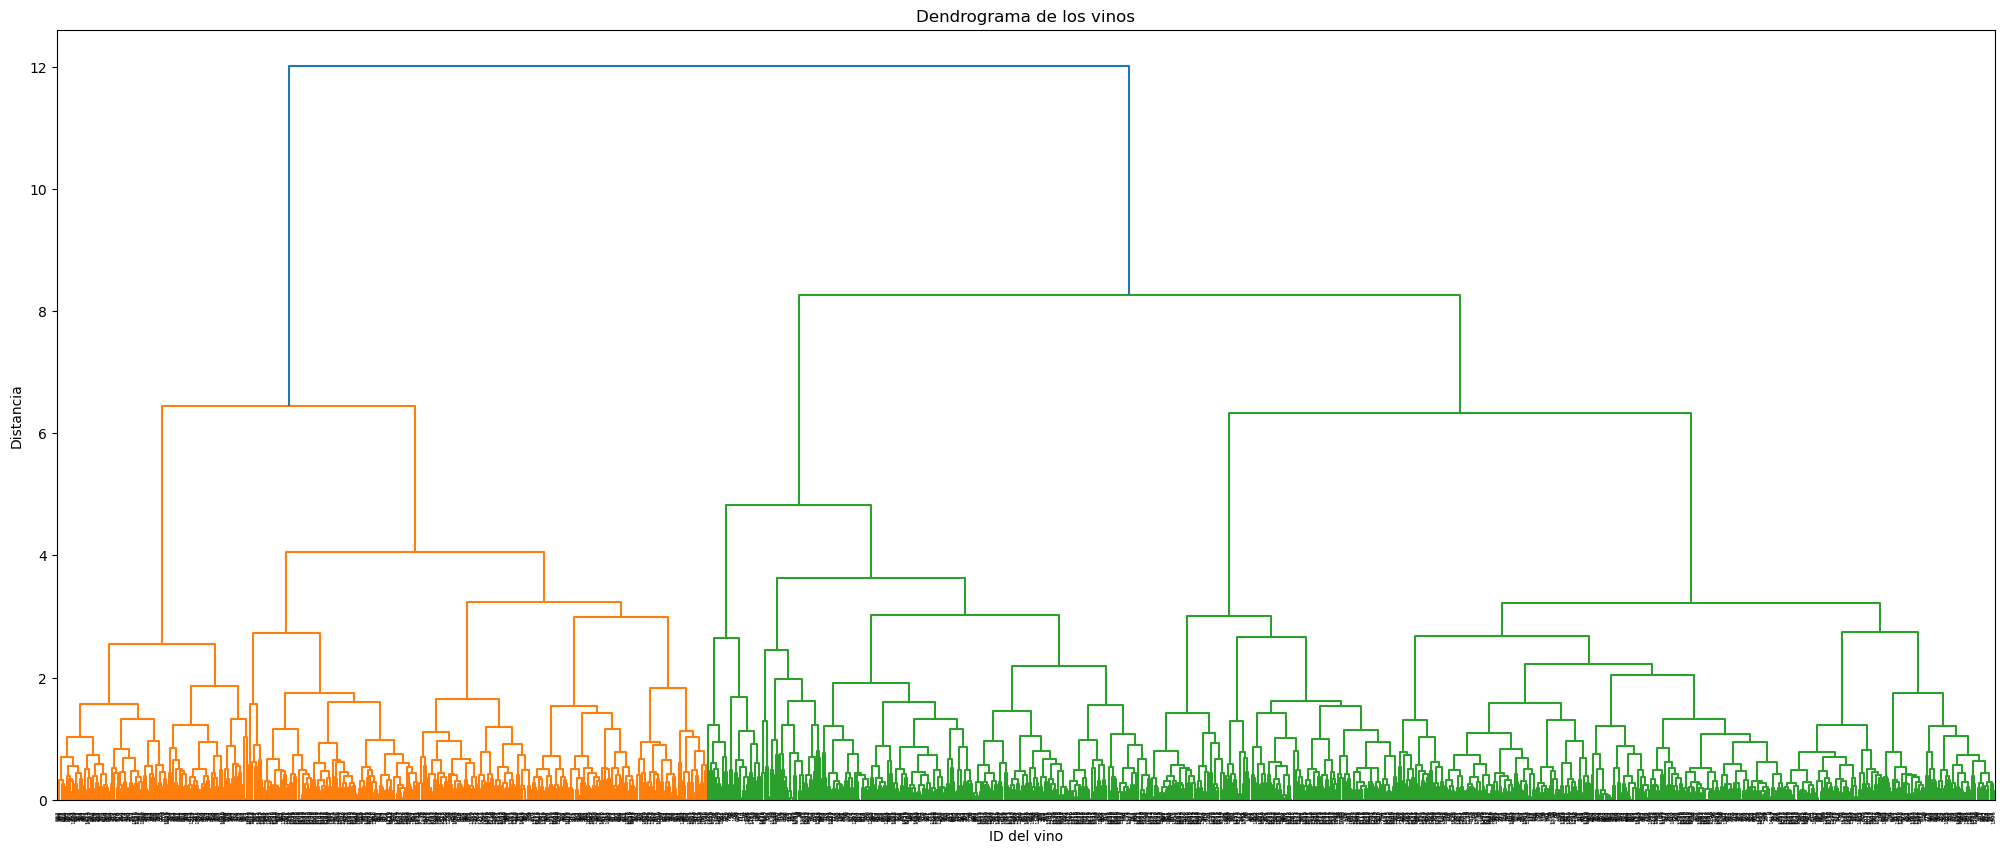

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_norm, "ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

K-means

In [51]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [53]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

C:\Users\victo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\victo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=6)

In [55]:
md_k = pd.Series(model.labels_) #model.labels_ indica el cluster al que pertenece

In [57]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [63]:
df_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  clust_h  clust_k  
0  0.153846      0.4        2        2  
1  0.215385      0.4        2        2  
2  0.215385      0.4        2        2  
3  0.215385      0.6        3        3  
4  0.153846      0.4        2        2

(array([296.,   0., 235.,   0., 368.,   0., 219.,   0., 216., 265.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

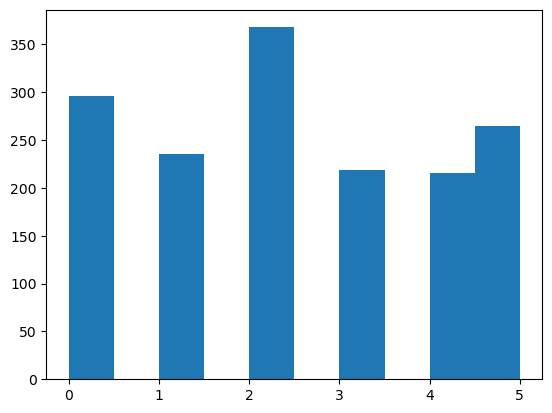

In [69]:
plt.hist(md_k)

In [71]:
model.cluster_centers_ #Nos devuelve el centro en las N dimensiones que tengaos de cada cluster

array([[0.33392131, 0.28246483, 0.27949324, 0.09207238, 0.13783671,
        0.13998858, 0.1337623 , 0.52430101, 0.41370504, 0.18544667,
        0.20706861, 0.475     ],
       [0.36998682, 0.15542116, 0.4326383 , 0.10652871, 0.10547366,
        0.16553791, 0.08393354, 0.40576124, 0.41236388, 0.24008154,
        0.50271686, 0.71404255],
       [0.23778376, 0.38178417, 0.06875   , 0.09327539, 0.12064492,
        0.16558864, 0.10501805, 0.47984901, 0.52152516, 0.15415907,
        0.2351519 , 0.43152174],
       [0.59473876, 0.20171076, 0.54789954, 0.13298305, 0.16580907,
        0.14438228, 0.09551931, 0.65897921, 0.31740553, 0.24698548,
        0.29916872, 0.5543379 ],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.32035398, 0.27637632, 0.31241509, 0.16417679, 0.13035562,
        0.40980601, 0.31304754, 0.54095808, 0.42876244, 0.19464467,
        0.22093856,

In [75]:
model.inertia_ #Suma de los cuadrdos internos/suma de los cuadrados totales. 
#Es decir a cada punto coge la distancia que hay entre ese punto y su baricentro y lo eleva al cuadrado.
#Después lo divide ??????

188.55762641020283

In [77]:
df_norm.groupby("clust_k").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
clust_k                                                                 
0             0.333921          0.282465     0.279493        0.092072   
1             0.369987          0.155421     0.432638        0.106529   
2             0.237784          0.381784     0.068750        0.093275   
3             0.594739          0.201711     0.547900        0.132983   
4             0.175516          0.317605     0.096343        0.093702   
5             0.320354          0.276376     0.312415        0.164177   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clust_k                                                                   
0         0.137837             0.139989              0.133762  0.524301   
1         0.105474             0.165538              0.083934  0.405761   
2         0.120645             0.165589              0.105018  0.479849   
3         0.165809             0.144382              0.095519  0.658979   
4         0.095437             0.247718              0.124117  0.319659   
5         0.130356             0.409806              0.313048  0.540958   

               pH  sulphates   alcohol   quality   clust_h  
clust_k                                                     
0        0.413705   0.185447  0.207069  0.475000  1.560811  
1        0.412364   0.240082  0.502717  0.714043  0.080851  
2        0.521525   0.154159  0.235152  0.431522  2.135870  
3        0.317406   0.246985  0.299169  0.554338  2.429224  
4        0.577063   0.187431  0.498243  0.617593  3.412037  
5        0.428762   0.194645  0.220939  0.456604  1.056604

In [85]:
df_norm.head(50)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.247788          0.397260         0.00        0.068493   0.106845   
1        0.283186          0.520548         0.00        0.116438   0.143573   
2        0.283186          0.438356         0.04        0.095890   0.133556   
3        0.584071          0.109589         0.56        0.068493   0.105175   
4        0.247788          0.397260         0.00        0.068493   0.106845   
5        0.247788          0.369863         0.00        0.061644   0.105175   
6        0.292035          0.328767         0.06        0.047945   0.095159   
7        0.238938          0.363014         0.00        0.020548   0.088481   
8        0.283186          0.315068         0.02        0.075342   0.101836   
9        0.256637          0.260274         0.36        0.356164   0.098497   
10       0.185841          0.315068         0.08        0.061644   0.141903   
11       0.256637          0.260274         0.36        0.356164   0.098497   
12       0.088496          0.339041         0.00        0.047945   0.128548   
13       0.283186          0.335616         0.29        0.047945   0.170284   
14       0.380531          0.342466         0.18        0.198630   0.273790   
15       0.380531          0.342466         0.19        0.205479   0.263773   
16       0.345133          0.109589         0.56        0.061644   0.133556   
17       0.309735          0.301370         0.28        0.054795   0.594324   
18       0.247788          0.321918         0.08        0.239726   0.123539   
19       0.292035          0.136986         0.51        0.061644   0.549249   
20       0.380531          0.068493         0.48        0.061644   0.108514   
21       0.265487          0.184932         0.31        0.095890   0.116861   
22       0.292035          0.212329         0.21        0.047945   0.156928   
23       0.345133          0.253425         0.11        0.095890   0.120200   
24       0.203540          0.191781         0.14        0.102740   0.121870   
25       0.150442          0.184932         0.16        0.034247   0.113523   
26       0.265487          0.198630         0.24        0.061644   0.113523   
27       0.292035          0.212329         0.21        0.047945   0.156928   
28       0.221239          0.404110         0.00        0.068493   0.113523   
29       0.283186          0.359589         0.00        0.075342   0.116861   
30       0.185841          0.380137         0.07        0.102740   0.128548   
31       0.203540          0.386986         0.00        0.109589   0.155259   
32       0.327434          0.366438         0.12        0.095890   0.118531   
33       0.203540          0.332192         0.12        0.671233   0.101836   
34       0.053097          0.136986         0.25        0.061644   0.151920   
35       0.283186          0.359589         0.00        0.315068   0.123539   
36       0.283186          0.328767         0.14        0.102740   0.123539   
37       0.309735          0.178082         0.28        0.082192   0.090150   
38       0.097345          0.691781         0.09        0.041096   0.267112   
39       0.238938          0.226027         0.36        0.342466   0.103506   
40       0.238938          0.226027         0.36        0.342466   0.103506   
41       0.371681          0.335616         0.30        0.130137   0.126878   
42       0.256637          0.253425         0.20        0.116438   0.534224   
43       0.309735          0.369863         0.22        0.089041   0.095159   
44       0.194690          0.376712         0.02        0.061644   0.063439   
45       0.000000          0.273973         0.15        0.082192   0.070117   
46       0.274336          0.558219         0.43        0.089041   0.170284   
47       0.362832          0.116438         0.52        0.047945   0.168614   
48       0.159292          0.191781         0.23        0.047945   0.090150   
49       0.088496          0.130137         0.37      

Para saber el número de clusters que tenemos que seleccionar vamos a usar dos metodos:

Método del codo: